In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from tabulate import tabulate
import math
import Functions

import warnings
warnings.filterwarnings("ignore")

#### In unbalance values of categorical feature and using countplot, the observation should only be made for within the value not the other values

In [2]:
def outlier_count(data, feature):
    
    first_quantile = np.quantile(data[feature], 0.25)
    third_quantile = np.quantile(data[feature], 0.75)
    IQ = third_quantile - first_quantile
    
    outliers = 0
    outliers += (data[feature] > (third_quantile+IQ*1.5)).sum()
    outliers += (data[feature] < (first_quantile-IQ*1.5)).sum()
    
    return outliers

In [3]:
student_data = pd.read_csv("StudentPerformance.csv")
student_data.drop(columns=["G1", "G2", "G3"], inplace=True)

In [4]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,22
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,31
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,37
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,42
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,37


In [5]:
student_data.shape

(649, 31)

In [6]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Score'],
      dtype='object')

In [7]:
student_data["Pedu"] = student_data["Medu"] + student_data["Fedu"]
student_data.drop(columns=["Medu", "Fedu"], inplace=True)

In [8]:
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Score         0
Pedu          0
dtype: int64

In [9]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc          649 non-null int64
health        649 no

In [10]:
numerical_features = student_data.select_dtypes(np.number).columns
categorical_features = student_data.select_dtypes(np.object).columns

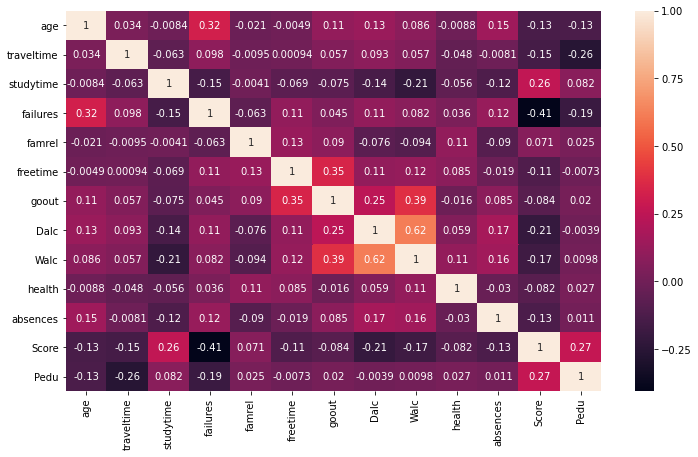

In [11]:
plt.figure(figsize=(12, 7))
corr_matrix = student_data.corr()
sns.heatmap(corr_matrix, annot=True)

In [12]:
test_data = student_data.sample(frac=0.12)
student_data = student_data.drop(index=test_data.index)

test_data = test_data.reset_index().drop(columns=["index"])
student_data = student_data.reset_index().drop(columns=["index"])

### In the entire dataset the we get to know parent education is one of the important feature for a good student which may not be as obvious which when looking a student.

## Univarient Analysis

### Score

In [13]:
student_data["Score"].describe()

count    571.000000
mean      34.796848
std        8.636767
min        4.000000
25%       30.000000
50%       34.000000
75%       40.000000
max       56.000000
Name: Score, dtype: float64

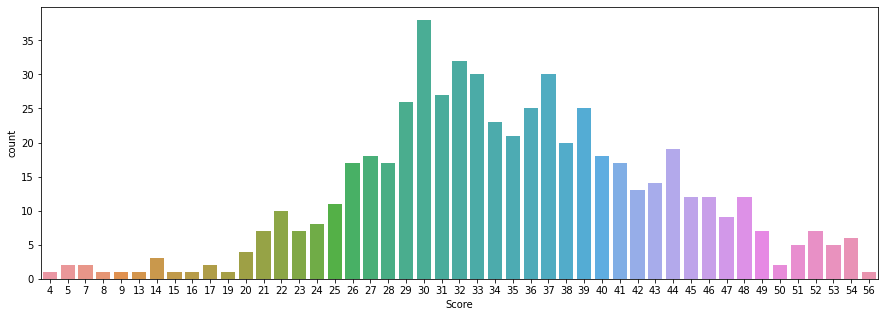

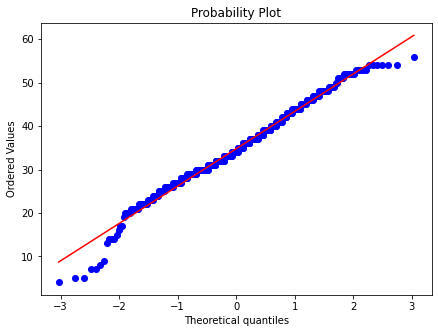

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(student_data["Score"])
plt.figure(figsize=(7, 5))
stat.probplot(student_data["Score"], dist="norm", plot=plt)
plt.show()

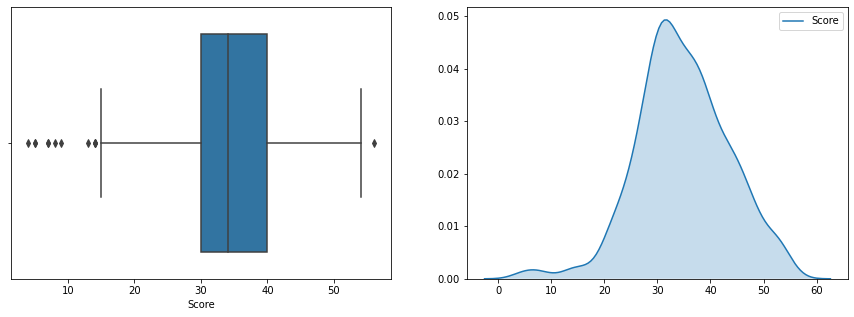

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(student_data["Score"], ax=ax[0])
sns.kdeplot(student_data["Score"], ax=ax[1], shade=True)

In [16]:
Functions.return_correlated_features(student_data, "Score")

                              Correlations of the features
feature              relation                             feature              relation       
Pedu                 0.28                                 freetime             -0.13          
studytime            0.26                                 absences             -0.13          
                                                          age                  -0.13          
                                                          traveltime           -0.17          
                                                          Walc                 -0.17          
                                                          Dalc                 -0.2           
                                                          failures             -0.41          


In [17]:
print("Number of Outliers : ", outlier_count(student_data, "Score"))

Number of Outliers :  12


### Age

In [18]:
student_data["age"].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [19]:
student_data["age"].describe()

count    571.000000
mean      16.740806
std        1.219462
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [20]:
student_data["age"].value_counts(normalize=True)

17    0.276708
16    0.266200
18    0.218914
15    0.176883
19    0.049037
20    0.007005
21    0.003503
22    0.001751
Name: age, dtype: float64

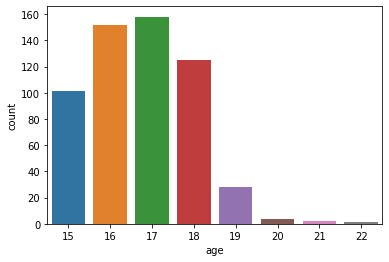

In [21]:
sns.countplot(student_data["age"])

In [22]:
Functions.return_correlated_features(student_data, "age")

                              Correlations of the features
feature              relation                             feature              relation       
failures             0.32                                 Pedu                 -0.11          
Dalc                 0.16                                 Score                -0.13          
absences             0.16                                                                     
goout                0.13                                                                     


* According to the data, older-student have more Goout time and alchol consumption, which is obvious reasoning. 

#### Q> How age affect the chances of failure ?

In [23]:
print(student_data.groupby("age")["failures"].count())
print(student_data.groupby("age")["failures"].mean())

age
15    101
16    152
17    158
18    125
19     28
20      4
21      2
22      1
Name: failures, dtype: int64
age
15    0.039604
16    0.131579
17    0.234177
18    0.304000
19    0.821429
20    1.250000
21    2.000000
22    3.000000
Name: failures, dtype: float64


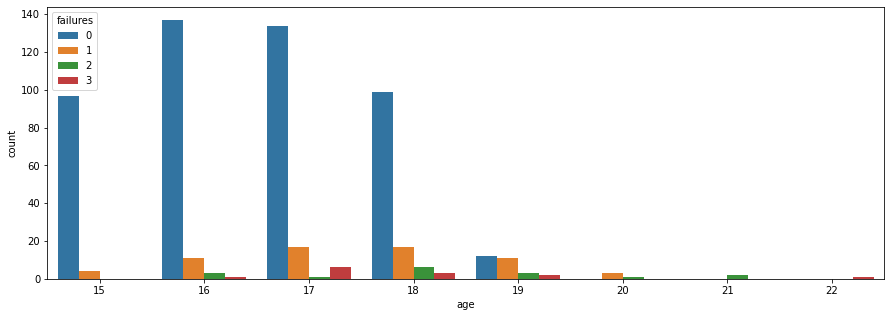

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(student_data["age"], hue=student_data["failures"])

* In the above observation we have excluded the age group 19-22 as it has very few observations.<br />
* According to remaining data as the age is increasing student who failes increases as seen in the graph<br/>
* Reason: this might be due to older student spend less time studying.

### Travel Time

In [25]:
student_data["traveltime"].unique()

array([2, 1, 3, 4], dtype=int64)

In [26]:
student_data["traveltime"].value_counts(normalize=True)

1    0.563923
2    0.327496
3    0.082312
4    0.026270
Name: traveltime, dtype: float64

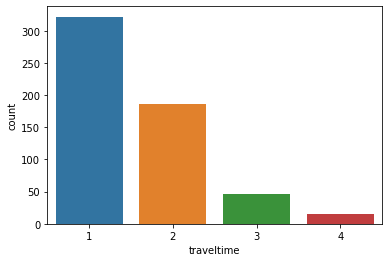

In [27]:
sns.countplot(student_data["traveltime"])

In [28]:
Functions.return_correlated_features(student_data, "traveltime")

                              Correlations of the features
feature              relation                             feature              relation       
failures             0.1                                  Score                -0.17          
                                                          Pedu                 -0.26          


### Study Time

In [29]:
student_data["studytime"].unique()

array([2, 3, 1, 4], dtype=int64)

In [30]:
student_data["studytime"].value_counts(normalize=True)

2    0.469352
1    0.330998
3    0.143608
4    0.056042
Name: studytime, dtype: float64

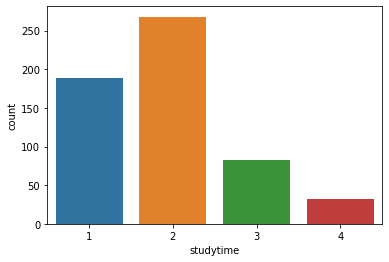

In [31]:
sns.countplot(student_data["studytime"])

In [32]:
Functions.return_correlated_features(student_data, "studytime")

                              Correlations of the features
feature              relation                             feature              relation       
Score                0.26                                 absences             -0.13          
                                                          failures             -0.14          
                                                          Dalc                 -0.15          
                                                          Walc                 -0.23          


* A Student who Study more will obviously be having higher grade.
* A Studious student will be less absent
* A Studious student will fail less in exam
* A Studious student will most likely in non-alcholic

#### Q> How the studytime affect the overall score ?

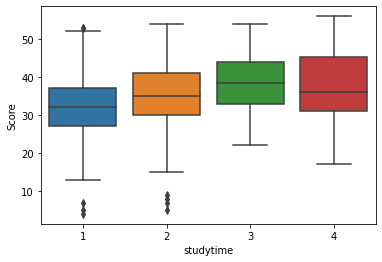

In [33]:
sns.boxplot(student_data["studytime"], student_data["Score"])

* There seems an obvious trend in the data, but there is a slight variation when the 'studytime' is 4 this might be due to the student preparing for other exams other than acadmics.

### Failures

In [34]:
student_data["failures"].unique()

array([0, 3, 1, 2], dtype=int64)

In [35]:
student_data["failures"].value_counts(normalize=True)

0    0.838879
1    0.110333
2    0.028021
3    0.022767
Name: failures, dtype: float64

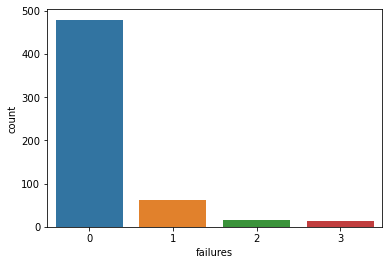

In [36]:
sns.countplot(student_data["failures"])

In [37]:
Functions.return_correlated_features(student_data, "failures")

                              Correlations of the features
feature              relation                             feature              relation       
age                  0.32                                 studytime            -0.14          
absences             0.14                                 Pedu                 -0.19          
freetime             0.13                                 Score                -0.41          
Dalc                 0.11                                                                     
traveltime           0.1                                                                      


### Traveltime and Absences may be the causation of Failure

* A student who is more absenet is class is more likely to fail
* A student who will travel more and study less will have high change of failure

### Family Relation

In [38]:
student_data["famrel"].unique()

array([4, 5, 3, 1, 2], dtype=int64)

In [39]:
student_data["famrel"].value_counts(normalize=True)

4    0.492119
5    0.274956
3    0.155867
2    0.043783
1    0.033275
Name: famrel, dtype: float64

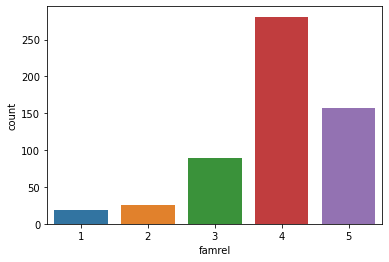

In [40]:
sns.countplot(student_data["famrel"])

In [41]:
Functions.return_correlated_features(student_data, "famrel")

                              Correlations of the features
feature              relation                             feature              relation       
health               0.1                                  Walc                 -0.11          
                                                          absences             -0.12          


### Free Time

In [42]:
student_data["freetime"].unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [43]:
student_data["freetime"].value_counts(normalize=True)

3    0.385289
4    0.273205
2    0.166375
5    0.099825
1    0.075306
Name: freetime, dtype: float64

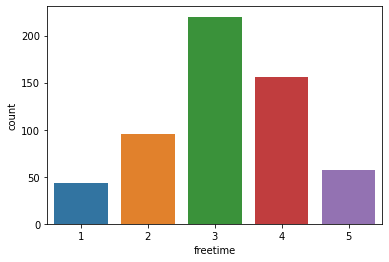

In [44]:
sns.countplot(student_data["freetime"])

In [45]:
Functions.return_correlated_features(student_data, "freetime")

                              Correlations of the features
feature              relation                             feature              relation       
goout                0.34                                 Score                -0.13          
failures             0.13                                                                     
Dalc                 0.12                                                                     
Walc                 0.12                                                                     


### Go Out

In [46]:
student_data["goout"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [47]:
student_data["goout"].value_counts(normalize=True)

3    0.311734
2    0.224168
4    0.222417
5    0.168126
1    0.073555
Name: goout, dtype: float64

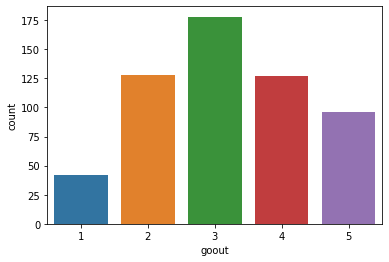

In [48]:
sns.countplot(student_data["goout"])

In [49]:
Functions.return_correlated_features(student_data, "goout")

                              Correlations of the features
feature              relation                             feature              relation       
Walc                 0.4                                                                      
freetime             0.34                                                                     
Dalc                 0.25                                                                     
age                  0.13                                                                     


* Alchol consumption and Go-out is related(caused) to age 

### Daily Alchol Consumption

In [50]:
student_data["Dalc"].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [51]:
student_data["Dalc"].value_counts(normalize=True)

1    0.698774
2    0.183888
3    0.068301
5    0.024518
4    0.024518
Name: Dalc, dtype: float64

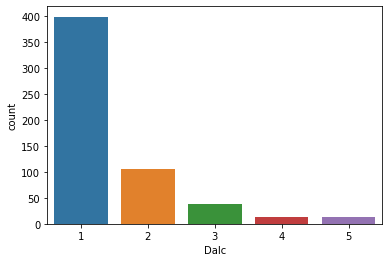

In [52]:
sns.countplot(student_data["Dalc"])

In [53]:
Functions.return_correlated_features(student_data, "Dalc")

                              Correlations of the features
feature              relation                             feature              relation       
Walc                 0.6                                  studytime            -0.15          
goout                0.25                                 Score                -0.2           
absences             0.19                                                                     
age                  0.16                                                                     
freetime             0.12                                                                     
failures             0.11                                                                     


### Age might be the causation of the alchol consumption of all the student who consume alchol

### Weekly Alchol Consumption

In [54]:
student_data["Walc"].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [55]:
student_data["Walc"].value_counts(normalize=True)

1    0.380035
2    0.227671
3    0.187391
4    0.134851
5    0.070053
Name: Walc, dtype: float64

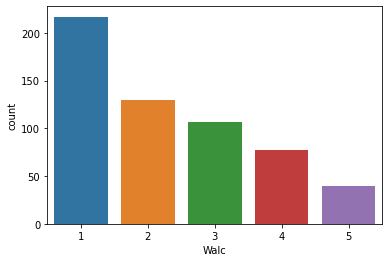

In [56]:
sns.countplot(student_data["Walc"])

In [57]:
Functions.return_correlated_features(student_data, "Walc")

                              Correlations of the features
feature              relation                             feature              relation       
Dalc                 0.6                                  famrel               -0.11          
goout                0.4                                  Score                -0.17          
absences             0.15                                 studytime            -0.23          
health               0.13                                                                     
freetime             0.12                                                                     


### Health
current health status (numeric: from 1 - very bad to 5 - very good) 

In [58]:
student_data["health"].unique()

array([3, 5, 1, 2, 4], dtype=int64)

In [59]:
student_data["health"].value_counts(normalize=True)

5    0.383538
3    0.180385
4    0.175131
1    0.141856
2    0.119089
Name: health, dtype: float64

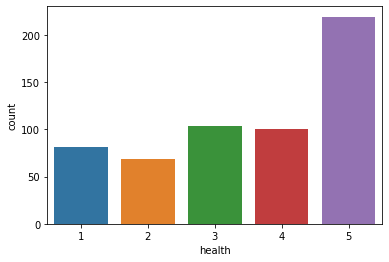

In [60]:
sns.countplot(student_data["health"])

In [61]:
Functions.return_correlated_features(student_data, "health")

                              Correlations of the features
feature              relation                             feature              relation       
Walc                 0.13                                                                     
famrel               0.1                                                                      


### Absences
number of school absences (numeric: from 0 to 93) 

In [62]:
student_data["absences"].describe()

count    571.000000
mean       3.616462
std        4.535050
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       30.000000
Name: absences, dtype: float64

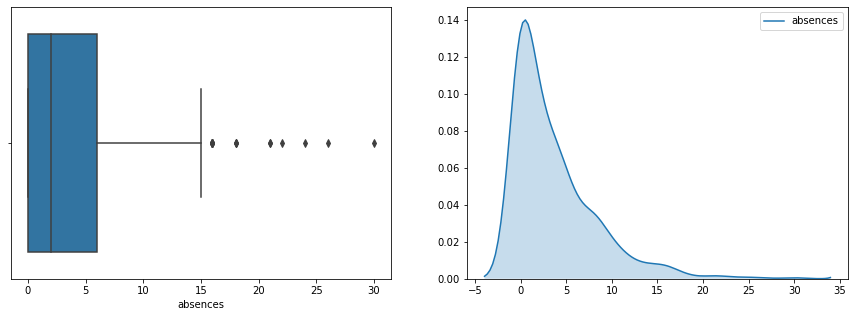

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(student_data["absences"], ax=ax[0])
sns.kdeplot(student_data["absences"], ax=ax[1], shade=True)

In [64]:
print("Number of Outliers :  ", outlier_count(student_data, "absences"))

Number of Outliers :   18


* In every school we have few students who are absent more often and this student are seen as Outlier in the graph

In [65]:
Functions.return_correlated_features(student_data, "absences")

                              Correlations of the features
feature              relation                             feature              relation       
Dalc                 0.19                                 famrel               -0.12          
age                  0.16                                 studytime            -0.13          
Walc                 0.15                                 Score                -0.13          
failures             0.14                                                                     


* An alcholic student will obviously be having more absences
* Relations:   Age, Alchol -> Absences, Studytime -> Score 

### School
student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

In [66]:
student_data["school"].unique()

array(['GP', 'MS'], dtype=object)

In [67]:
student_data["school"].value_counts(normalize=True)

GP    0.65324
MS    0.34676
Name: school, dtype: float64

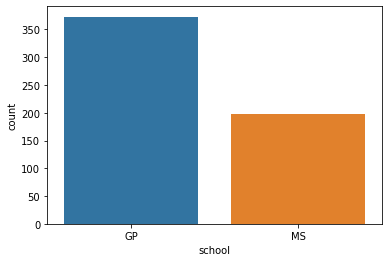

In [68]:
sns.countplot(student_data["school"])

In [69]:
Functions.return_categorical_related_feature(student_data, "school")

Correlations of the features
feature              p value             
school               3.0920519649545987e-125
sex                  0.028019439734760194
address              2.3663949599338907e-18
Mjob                 6.101951873135586e-07
Fjob                 0.006583018303202811
reason               1.2481342745440126e-09
traveltime           1.0485500363907728e-11
studytime            0.00844357311194942 
failures             0.002778172486189806
schoolsup            0.004713113182511045
higher               0.01749259016778687 
internet             1.358833646604544e-08
famrel               0.015928368636548552
freetime             0.006372323906543501
goout                0.03133734744168901 
absences             1.8755458333975557e-07
Score                1.1266885961886921e-06
Pedu                 9.89379816455082e-08


* Self explaintory features: address, traveltime

### Q> Is School and Score related ?

In [70]:
student_data.groupby("school")["Score"].median()

school
GP    36
MS    30
Name: Score, dtype: int64

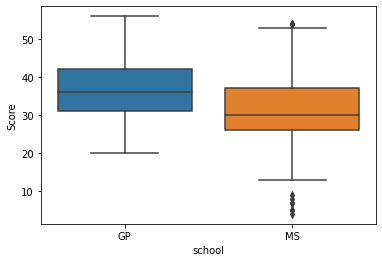

In [71]:
sns.boxplot(student_data["school"], student_data["Score"])

Conclusion: Yes, GP school's Student give higher score than MS school student's

### Is Sex and School related ?

In [72]:
student_data.groupby("school")["sex"].value_counts(normalize=True)

school  sex
GP      F      0.563003
        M      0.436997
MS      F      0.661616
        M      0.338384
Name: sex, dtype: float64

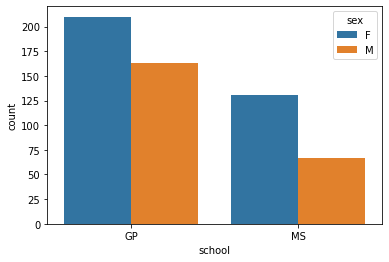

In [73]:
sns.countplot(student_data["school"], hue=student_data["sex"])

Conclusion: No, it just that no. of student's came for Survey were mostly Female.

### Are Highly educated parent choosing a specific school ?

In [74]:
student_data.groupby("school")["Pedu"].mean()

school
GP    5.163539
MS    4.095960
Name: Pedu, dtype: float64

Conclusion: Yes

### Sex

In [75]:
student_data["sex"].unique()

array(['F', 'M'], dtype=object)

In [76]:
student_data["sex"].value_counts(normalize=True)

F    0.597198
M    0.402802
Name: sex, dtype: float64

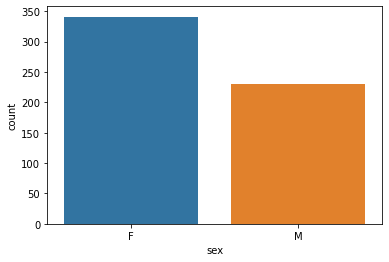

In [77]:
sns.countplot(student_data["sex"])

In [78]:
Functions.return_categorical_related_feature(student_data[categorical_features], "sex")

Correlations of the features
feature              p value             
school               0.028019439734760194
sex                  2.71911286229949e-125
famsize              0.00594521827441909 
Mjob                 0.005349720055921861
schoolsup            0.00937028598393752 
famsup               0.0005213600501694965
activities           0.0006587254562476193
romantic             0.022248713583579754


### Q> Is there any relation between Sex and Score ?

In [79]:
student_data.groupby("sex")["Score"].mean()

sex
F    35.577713
M    33.639130
Name: Score, dtype: float64

Conclusion: No, it might seems some difference but the diff is not significant.

### Internet

In [80]:
student_data["internet"].unique()

array(['no', 'yes'], dtype=object)

In [81]:
student_data["internet"].value_counts(normalize=True)

yes    0.758319
no     0.241681
Name: internet, dtype: float64

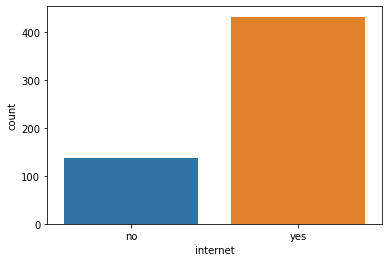

In [82]:
sns.countplot(student_data["internet"])

In [83]:
Functions.return_categorical_related_feature(student_data[categorical_features], "internet")

Correlations of the features
feature              p value             
school               1.358833646604544e-08
address              0.00011327974447051636
Mjob                 1.0484672145010067e-09
Fjob                 0.04709903871888871 
reason               0.005182472743472185
activities           0.02784643660084668 
internet             5.198426574869933e-125


### Is Internet related to Score ?

In [84]:
student_data.groupby("internet")["Score"].mean()

internet
no     32.275362
yes    35.600462
Name: Score, dtype: float64

Conclusion: it may seem a relation but the it might not be a direct causation i.e. there must be some other feature along with internet feature that are causing it

### Address
student's home address type (binary: 'U' - urban or 'R' - rural) 

In [85]:
student_data["address"].unique()

array(['U', 'R'], dtype=object)

In [86]:
student_data["address"].value_counts(normalize=True)

U    0.69352
R    0.30648
Name: address, dtype: float64

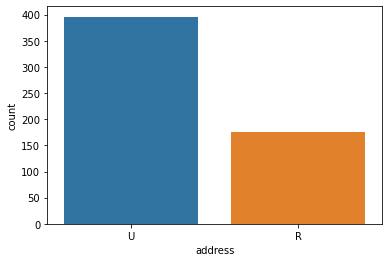

In [87]:
sns.countplot(student_data["address"])

In [88]:
Functions.return_categorical_related_feature(student_data, "address")

Correlations of the features
feature              p value             
school               2.3663949599338745e-18
address              3.573563795993136e-125
Pstatus              0.013104333395195997
Mjob                 7.994546307092273e-05
reason               0.0008376263662128057
traveltime           3.0656693442842664e-14
failures             0.014795943253136525
internet             0.00011327974447051658
Score                0.0028930386959466533
Pedu                 0.0005841276278758874


### Q> Are student living in rural places prefer a particular school ?

In [89]:
student_data.groupby("address")["school"].value_counts(normalize=True)

address  school
R        MS        0.611429
         GP        0.388571
U        GP        0.770202
         MS        0.229798
Name: school, dtype: float64

Conclusion: There is an significant relation, Rural student prefers 'MS' school more as compared to Urban student who prefers 'GP' school, this might be because distance, fees or other reasons

### Q> How much is traveltime and address related ?

In [90]:
student_data.groupby("address")["traveltime"].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,175.0,1.948571,0.846009,1.0,1.0,2.0,2.0,4.0
U,396.0,1.404040,0.643081,1.0,1.0,1.0,2.0,4.0


Conclusion: it seems according to mean, median and std that rural student's have more traveltime this might be because the distance from rural place to both school is not be small

### Q> How much is failure and address related ?

In [91]:
student_data.groupby("address")["failures"].value_counts(normalize=True)

address  failures
R        0           0.782857
         1           0.165714
         3           0.034286
         2           0.017143
U        0           0.863636
         1           0.085859
         2           0.032828
         3           0.017677
Name: failures, dtype: float64

Conclusion: Result doesn't seems to be significant

### Q> How much is score and address related ?

In [92]:
student_data.groupby("address")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,175.0,32.565714,9.132799,4.0,27.0,32.0,39.0,56.0
U,396.0,35.782828,8.229204,5.0,30.0,36.0,41.0,54.0


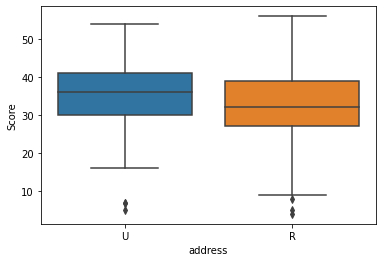

In [93]:
sns.boxplot(student_data["address"], student_data["Score"])

Conclusion: According to the data, it seems like Urban student's score more than Rural student's this might be because Urban student have more facilities than Rural student like internet, less traveltime etc..

### Family Size
family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

In [94]:
student_data["famsize"].unique()

array(['GT3', 'LE3'], dtype=object)

In [95]:
student_data["famsize"].value_counts(normalize=True)

GT3    0.697023
LE3    0.302977
Name: famsize, dtype: float64

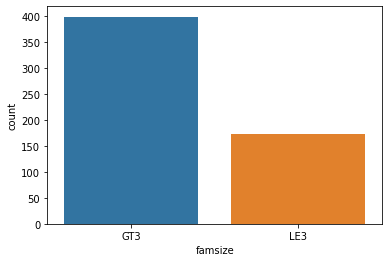

In [96]:
sns.countplot(student_data["famsize"])

In [97]:
Functions.return_categorical_related_feature(student_data, "famsize")

Correlations of the features
feature              p value             
sex                  0.00594521827441909 
famsize              3.628301446224352e-125
Pstatus              2.1412502369773386e-09


* It is most obivious that 'Family size' is related to Parent Status

### Q> Family size and Score ?

In [98]:
student_data.groupby("famsize")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
famsize,,,,,,,,
GT3,398.0,34.645729,8.807349,4.0,30.0,34.5,40.0,54.0
LE3,173.0,35.144509,8.245290,5.0,30.0,34.0,41.0,56.0


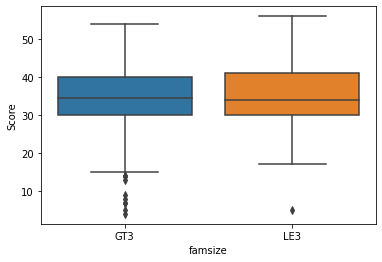

In [99]:
sns.boxplot(student_data["famsize"], student_data["Score"])

Conclusion: There is no strong relation between Family size and Score

### Parent Status
parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

In [100]:
student_data["Pstatus"].unique()

array(['A', 'T'], dtype=object)

In [101]:
student_data["Pstatus"].value_counts(normalize=True)

T    0.870403
A    0.129597
Name: Pstatus, dtype: float64

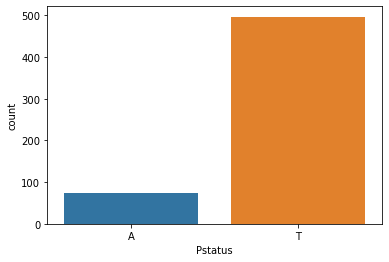

In [102]:
sns.countplot(student_data["Pstatus"])

In [103]:
Functions.return_categorical_related_feature(student_data, "Pstatus")

Correlations of the features
feature              p value             
address              0.013104333395195997
famsize              2.1412502369773386e-09
Pstatus              2.836122941659658e-124
guardian             9.569751918774442e-05
activities           0.029029847146763328
absences             0.0003630521886827686


* The most obivious relation that is visible is the 'Famsize' and 'Guardian'

### Q> Relation between Student score and Parent status ?

In [104]:
student_data.groupby("Pstatus")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Pstatus,,,,,,,,
A,74.0,34.608108,9.214071,5.0,30.0,34.5,41.75,52.0
T,497.0,34.824950,8.556945,4.0,30.0,34.0,40.00,56.0


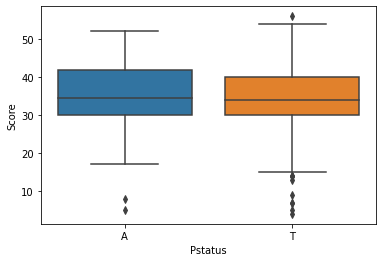

In [105]:
sns.boxplot(student_data["Pstatus"], student_data["Score"])

Conclusion: No significant relation found

### Mother and Father Jobs
nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

In [106]:
student_data["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [107]:
# Creating new feature which is combination of Mjob and Fjob
# I have also given preferance to the jobs e.g. 'home' has 0 and 'teacher' has 4
job_mapper = {'at_home': 0, 'other': 1, 'services': 2, 'teacher': 4, 'health': 3}
student_data["Mjob"] = student_data["Mjob"].map(job_mapper)
student_data["Fjob"] = student_data["Fjob"].map(job_mapper)
student_data["Pjob"] = student_data["Fjob"] + student_data["Mjob"]
student_data.drop(columns=["Fjob", "Mjob"], inplace=True)

In [108]:
student_data["Pjob"].unique()

array([4, 1, 5, 2, 3, 7, 6, 8, 0], dtype=int64)

In [109]:
student_data["Pjob"].value_counts(normalize=True)

2    0.355517
3    0.166375
1    0.145359
4    0.129597
5    0.080560
6    0.056042
0    0.028021
8    0.026270
7    0.012259
Name: Pjob, dtype: float64

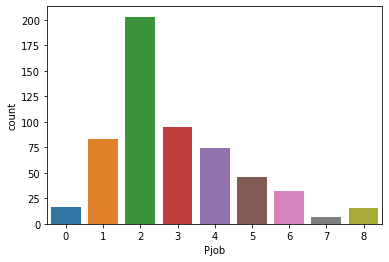

In [110]:
sns.countplot(student_data["Pjob"])

In [111]:
Functions.return_categorical_related_feature(student_data, "Pjob")

Correlations of the features
feature              p value             
school               3.1413983424380306e-05
sex                  0.008667411040755755
address              0.0027398462726616157
higher               0.007797137169110756
internet             1.5160864144530326e-07
Pedu                 4.1509165578289145e-38
Pjob                 0.0                 


* Most strong relation is with Parent education which is obvious

### Q> Relation between Student score and Pjob ?

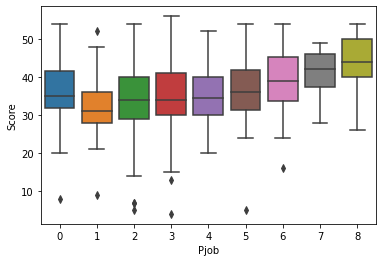

In [112]:
sns.boxplot(student_data["Pjob"], student_data["Score"])

Conclusion: It might have some relation, but relation might not be a causation<br/>
Trend might be explained like this, since Parent job is related to Parent education and Parent education is related to higher score, this is the reason for trend.

### Reasons
reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

In [113]:
student_data["reason"].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [114]:
student_data["reason"].value_counts(normalize=True)

course        0.432574
home          0.234676
reputation    0.225919
other         0.106830
Name: reason, dtype: float64

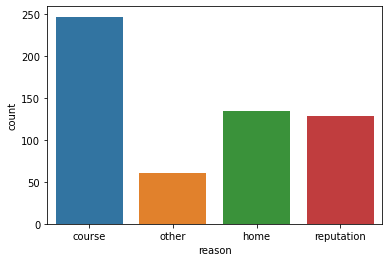

In [115]:
sns.countplot(student_data["reason"])

In [116]:
Functions.return_categorical_related_feature(student_data, "reason")

Correlations of the features
feature              p value             
school               1.2481342745440126e-09
address              0.0008376263662128082
reason               0.0                 
traveltime           0.009722659405217153
studytime            0.00024216716945018037
failures             0.006618908094468882
activities           0.012664253499659661
internet             0.005182472743472185
Score                0.041694883107638255


### Q> Is School and Reason related ?

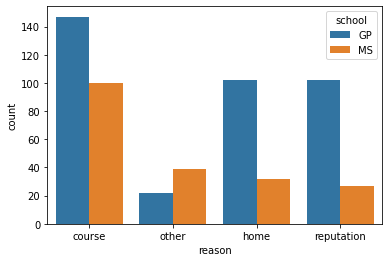

In [117]:
sns.countplot(student_data["reason"], hue=student_data["school"])

Conclusion: Yes, there is a mild relation between 'School choosen' and 'Reason'

### Q> Are student having particular reason, study more ?

In [118]:
student_data.groupby("reason")["studytime"].describe()

,count,mean,std,min,25%,50%,75%,max
reason,,,,,,,,
course,247.0,1.842105,0.818590,1.0,1.0,2.0,2.0,4.0
home,134.0,1.917910,0.785666,1.0,1.0,2.0,2.0,4.0
other,61.0,1.672131,0.723909,1.0,1.0,2.0,2.0,4.0
reputation,129.0,2.209302,0.889825,1.0,2.0,2.0,3.0,4.0


### Guardian
student's guardian (nominal: 'mother', 'father' or 'other')

In [119]:
student_data["guardian"].unique()

array(['mother', 'father', 'other'], dtype=object)

In [120]:
student_data["guardian"].value_counts(normalize=True)

mother    0.707531
father    0.229422
other     0.063047
Name: guardian, dtype: float64

In [121]:
Functions.return_categorical_related_feature(student_data, "guardian")

Correlations of the features
feature              p value             
age                  2.1284549530101385e-22
Pstatus              9.56975191877446e-05
guardian             5.960008265558774e-246
failures             4.520794614506735e-09
nursery              0.0053912989905993  
higher               3.265815264107945e-05
romantic             0.011055986070940996
Dalc                 0.0017481371123712365
absences             0.00713762067920371 


### Q> Is a particular guardian result in student's higher score ?

In [122]:
student_data.groupby("guardian")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
guardian,,,,,,,,
father,131.0,36.007634,8.126402,5.0,31.00,36.0,41.00,54.0
mother,404.0,34.735149,8.845891,4.0,29.00,34.0,40.00,56.0
other,36.0,31.083333,6.987233,8.0,26.75,31.0,34.25,44.0


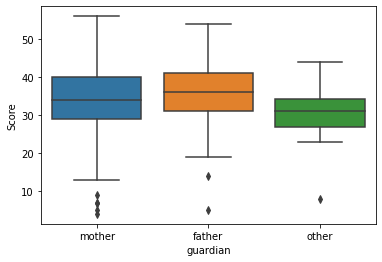

In [123]:
sns.boxplot(student_data["guardian"], student_data["Score"])

Conclusion: When the guardian is other than 'Mother'/'Father' the student performance is poor but when the guardian is either the 'Mother' or the 'Father' the score is almost similar

### School Support
extra educational support (binary: yes or no) 

In [124]:
student_data["schoolsup"].unique()

array(['yes', 'no'], dtype=object)

In [125]:
student_data["schoolsup"].value_counts(normalize=True)

no     0.891419
yes    0.108581
Name: schoolsup, dtype: float64

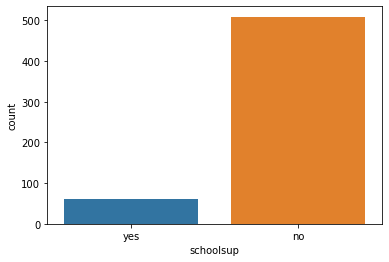

In [126]:
sns.countplot(student_data["schoolsup"])

In [127]:
Functions.return_categorical_related_feature(student_data, "schoolsup")

Correlations of the features
feature              p value             
school               0.004713113182511045
sex                  0.00937028598393752 
age                  0.002616282214188063
studytime            0.010363912922049233
schoolsup            5.875279654545773e-124
Walc                 0.007915504059581734


### Q> Which school provide better school support ?

In [128]:
student_data.groupby("school")["schoolsup"].value_counts(normalize=True)

school  schoolsup
GP      no           0.863271
        yes          0.136729
MS      no           0.944444
        yes          0.055556
Name: schoolsup, dtype: float64

Conclusion: GP school provide more support

### Q> Does providing student support helps them in getting better score ?

In [129]:
student_data.groupby("schoolsup")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
schoolsup,,,,,,,,
no,509.0,35.009823,8.868123,4.0,30.0,34.0,41.0,56.0
yes,62.0,33.048387,6.213226,16.0,29.0,32.5,37.0,53.0


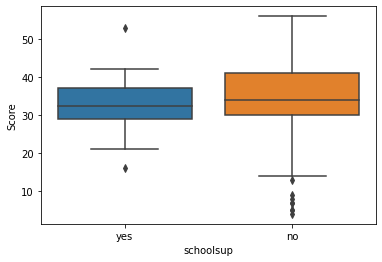

In [130]:
sns.boxplot(student_data["schoolsup"], student_data["Score"])

In [131]:
# If a student's getting schoolsup have same or higher 'student score' but less 'studytime' then we can say
# that there is some relation between schoolsup and student score
student_data.groupby("schoolsup")["studytime"].describe()

,count,mean,std,min,25%,50%,75%,max
schoolsup,,,,,,,,
no,509.0,1.895874,0.831801,1.0,1.0,2.0,2.0,4.0
yes,62.0,2.161290,0.813685,1.0,2.0,2.0,2.0,4.0


Conclusion: There seem no special singnificance

### Family Support
family educational support (binary: yes or no) 

In [132]:
student_data["famsup"].unique()

array(['no', 'yes'], dtype=object)

In [133]:
student_data["famsup"].value_counts(normalize=True)

yes    0.605954
no     0.394046
Name: famsup, dtype: float64

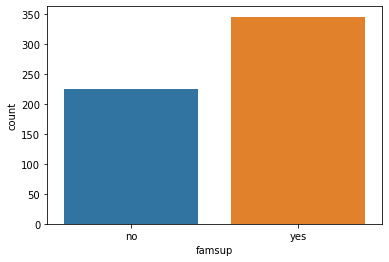

In [134]:
sns.countplot(student_data["famsup"])

In [135]:
Functions.return_categorical_related_feature(student_data, "famsup")

Correlations of the features
feature              p value             
sex                  0.0005213600501694965
studytime            0.002385442355866163
famsup               2.7614664616815597e-125
paid                 0.04340049050061564 
Dalc                 0.025242982489934562
Pedu                 0.0007616913221178018


### Q> Does higher educated parent gives more support ?

In [136]:
student_data.groupby("famsup")["Pedu"].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,225.0,4.466667,1.920286,1.0,3.0,4.0,6.0,8.0
yes,346.0,5.005780,2.055737,0.0,4.0,5.0,7.0,8.0


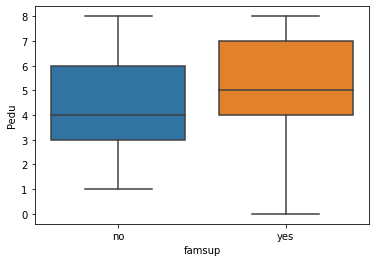

In [137]:
sns.boxplot(student_data["famsup"], student_data["Pedu"])

In [138]:
# If we compare quantile values of student who got schoolsup and who didn't then we may get some result
# for e.g. if most of the qunatile values for student who got the schoolsup is greater than student who didn't got
# the schoolsup then we can say that there is some relation
got_support = student_data[student_data["famsup"] == "yes"]["Score"]
did_not_support = student_data[student_data["famsup"] == "no"]["Score"]
print([np.quantile(got_support, 0.1), np.quantile(did_not_support, 0.1)])
print([np.quantile(got_support, 0.2), np.quantile(did_not_support, 0.2)])
print([np.quantile(got_support, 0.3), np.quantile(did_not_support, 0.3)])
print([np.quantile(got_support, 0.4), np.quantile(did_not_support, 0.4)])
print([np.quantile(got_support, 0.5), np.quantile(did_not_support, 0.5)])
print([np.quantile(got_support, 0.6), np.quantile(did_not_support, 0.6)])
print([np.quantile(got_support, 0.7), np.quantile(did_not_support, 0.7)])
print([np.quantile(got_support, 0.8), np.quantile(did_not_support, 0.8)])
print([np.quantile(got_support, 0.9), np.quantile(did_not_support, 0.9)])
print([np.quantile(got_support, 1.0), np.quantile(did_not_support, 1.0)])

[26.0, 24.0]
[29.0, 28.0]
[31.0, 30.0]
[33.0, 31.60000000000001]
[35.0, 33.0]
[37.0, 36.400000000000006]
[39.0, 39.0]
[42.0, 42.0]
[47.0, 46.0]
[56.0, 54.0]


Conclusion: It is hard to tell any affect, but it does shows somewhat positive relation

### Q> Does Family support increases Study time ?

In [139]:
student_data.groupby("famsup")["studytime"].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,225.0,1.768889,0.790519,1.0,1.0,2.0,2.0,4.0
yes,346.0,2.026012,0.845733,1.0,1.0,2.0,2.0,4.0


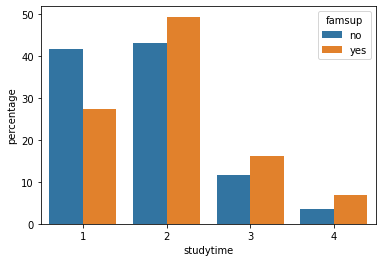

In [140]:
studytime_counts = (student_data.groupby(['famsup'])['studytime']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('studytime'))
p = sns.barplot(x="studytime", y="percentage", hue="famsup", data=studytime_counts)

Conclusion: It does seem a slight increase in student's studytime when student got famsup, but the result is not that significant

### Q> Does Family support affect the student score ?

In [141]:
student_data.groupby("famsup")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,225.0,34.075556,9.316296,4.0,29.0,33.0,40.00,54.0
yes,346.0,35.265896,8.144268,7.0,30.0,35.0,40.75,56.0


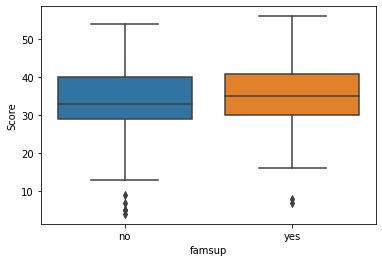

In [142]:
sns.boxplot(student_data["famsup"], student_data["Score"])

### Paid
extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

In [144]:
student_data["paid"].unique()

array(['no', 'yes'], dtype=object)

In [145]:
student_data["paid"].value_counts(normalize=True)

no     0.942207
yes    0.057793
Name: paid, dtype: float64

In [146]:
Functions.return_categorical_related_feature(student_data, "paid")

Correlations of the features
feature              p value             
age                  0.04844188688063327 
famsup               0.04340049050061564 
paid                 3.1225860904019e-122


### Q> Does taking additional tution classes increases Score ?

In [147]:
student_data.groupby("paid")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
paid,,,,,,,,
no,538.0,34.907063,8.711959,4.0,30.0,34.0,41.0,56.0
yes,33.0,33.000000,7.176350,14.0,29.0,34.0,37.0,49.0


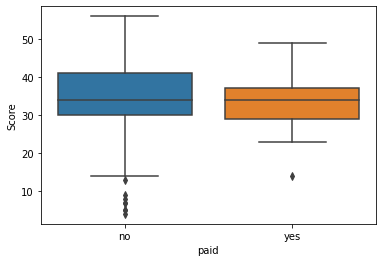

In [148]:
sns.boxplot(student_data["paid"], student_data["Score"])

No conclusion can be drawn as the data sample is very small

### Activities
extra-curricular activities (binary: yes or no) 

In [149]:
student_data["activities"].unique()

array(['no', 'yes'], dtype=object)

In [150]:
student_data["activities"].value_counts(normalize=True)

no     0.523643
yes    0.476357
Name: activities, dtype: float64

In [151]:
Functions.return_categorical_related_feature(student_data, "paid")

Correlations of the features
feature              p value             
age                  0.04844188688063327 
famsup               0.04340049050061564 
paid                 3.1225860904019e-122


* Paid classes are the causation for activiter because of Obivious reasons.

### Nursery
attended nursery school (binary: yes or no) 

In [152]:
student_data["nursery"].unique()

array(['yes', 'no'], dtype=object)

In [153]:
student_data["nursery"].value_counts(normalize=True)

yes    0.805604
no     0.194396
Name: nursery, dtype: float64

In [154]:
Functions.return_categorical_related_feature(student_data, "nursery")

Correlations of the features
feature              p value             
guardian             0.005391298990599292
nursery              8.258911326329253e-125
absences             0.029644944496960157


### Higher
wants to take higher education (binary: yes or no) 

In [155]:
student_data["higher"].unique()

array(['yes', 'no'], dtype=object)

In [156]:
student_data["higher"].value_counts(normalize=True)

yes    0.89317
no     0.10683
Name: higher, dtype: float64

In [157]:
Functions.return_categorical_related_feature(student_data, "higher")

Correlations of the features
feature              p value             
school               0.01749259016778687 
age                  3.2430622612808506e-09
guardian             3.265815264107945e-05
traveltime           0.0480092598939055  
studytime            2.967459140910225e-05
failures             2.280510907694386e-13
higher               6.3255449309603465e-124
freetime             0.01149715167199577 
goout                0.0012855836339937675
Dalc                 0.011881429869791451
absences             0.000634034442506224
Score                2.642645623714808e-13
Pedu                 0.00017554398349074344
Pjob                 0.007797137169110775


### Q> Does student who want to continue higher education have higher study time ?

In [158]:
student_data.groupby("higher")["studytime"].describe()

,count,mean,std,min,25%,50%,75%,max
higher,,,,,,,,
no,61.0,1.524590,0.766084,1.0,1.0,1.0,2.0,4.0
yes,510.0,1.972549,0.828775,1.0,1.0,2.0,2.0,4.0


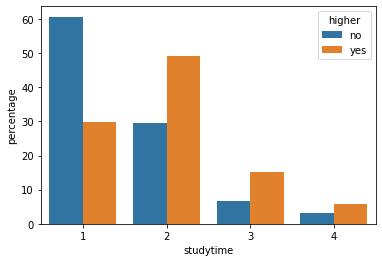

In [160]:
studytime_counts = (student_data.groupby(['higher'])['studytime']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('studytime'))
p = sns.barplot(x="studytime", y="percentage", hue="higher", data=studytime_counts)

### Romantic
 with a romantic relationship (binary: yes or no) 

In [161]:
student_data["romantic"].unique()

array(['no', 'yes'], dtype=object)

In [162]:
student_data["romantic"].value_counts(normalize=True)

no     0.637478
yes    0.362522
Name: romantic, dtype: float64

In [163]:
Functions.return_categorical_related_feature(student_data, "romantic")

Correlations of the features
feature              p value             
sex                  0.022248713583579754
age                  0.03214813540568555 
guardian             0.011055986070940996
romantic             2.9599096585547005e-125
